<a href="https://colab.research.google.com/github/arjundai/Foundationofdatascience/blob/main/RiskBehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data1 = pd.read_csv("/content/drive/My Drive/dataset1 (1).csv")

In [55]:
import os

# List files in the root of My Drive
drive_root = '/content/drive/My Drive/'
print(f"Files in {drive_root}:")
for root, dirs, files in os.walk(drive_root):
    for file in files:
        print(os.path.join(root, file))
    # To avoid listing too many files, you can limit the depth of the search
    # by commenting out or modifying the following line:
    break # Remove this line to search subfolders

Files in /content/drive/My Drive/:
/content/drive/My Drive/0-8179796287_20210919_102401_0000.pdf
/content/drive/My Drive/CamScanner 10-28-2021 10.27.pdf
/content/drive/My Drive/COE (1).pdf
/content/drive/My Drive/s257A (s40) Requirement to Provide Biometrics(1) (1).pdf
/content/drive/My Drive/s257A (s40) Requirement to Provide Biometrics(1).pdf
/content/drive/My Drive/IMMI Grant Notification(3) (6).pdf
/content/drive/My Drive/IMMI Grant Notification(3) (5).pdf
/content/drive/My Drive/IMMI Grant Notification(3) (4).pdf
/content/drive/My Drive/IMMI Grant Notification(3) (3).pdf
/content/drive/My Drive/IMMI Grant Notification(3) (2).pdf
/content/drive/My Drive/IMMI Grant Notification(3) (1).pdf
/content/drive/My Drive/IMMI Grant Notification(3).pdf
/content/drive/My Drive/Check List  form.pdf
/content/drive/My Drive/Consolidated Interview Questions V1.6 - Copy.pdf
/content/drive/My Drive/Pre_employment_questionnaire_062020.pdf
/content/drive/My Drive/Student ID Number.docx
/content/drive/

In [56]:
data2 = pd.read_csv("/content/drive/My Drive/dataset2 (1).csv")

In [57]:
data1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [58]:
data2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


data1 preprocessing phase


In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


In [60]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


In [61]:
data2.isnull().sum()

,0
time,0
month,0
hours_after_sunset,0
bat_landing_number,0
food_availability,0
rat_minutes,0
rat_arrival_number,0


In [62]:
data1['habit'].nunique()

81

In [63]:
data1.dropna(subset=['habit'], inplace=True)

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 866 non-null    object 
 1   bat_landing_to_food        866 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           866 non-null    object 
 4   rat_period_end             866 non-null    object 
 5   seconds_after_rat_arrival  866 non-null    int64  
 6   risk                       866 non-null    int64  
 7   reward                     866 non-null    int64  
 8   month                      866 non-null    int64  
 9   sunset_time                866 non-null    object 
 10  hours_after_sunset         866 non-null    float64
 11  season                     866 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 88.0+ KB


In [65]:
data1['risk'] = data1['risk'].astype(int)

In [66]:
reward_rat = data1.groupby('risk')['reward'].mean()
reward_rat

,reward
risk,
0,0.925659
1,0.218263


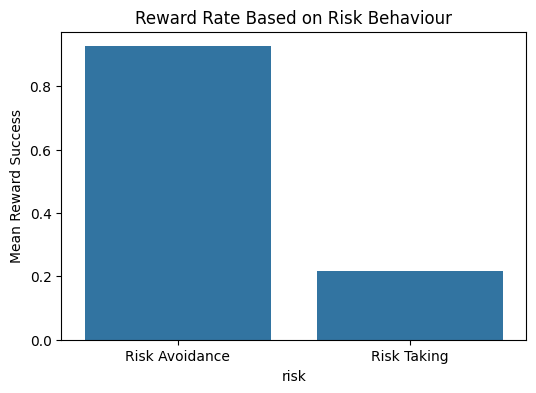

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(x=reward_rat.index, y=reward_rat.values)
plt.xticks([0,1], ["Risk Avoidance", "Risk Taking"])
plt.ylabel("Mean Reward Success")
plt.title("Reward Rate Based on Risk Behaviour")
plt.show()

lets perform chi square test for dependency in risk and reward
* H0 : Risk  and reward are independent
* H1  : risk taking and reward are dependent

In [68]:
from scipy.stats import chi2_contingency

In [69]:
contingence = pd.crosstab(data1['risk'], data1['reward'])
_,p_value,_,_= chi2_contingency(contingence)

In [70]:
print(p_value)

8.088801974471012e-97


p value is ~ 0 so hypothesis 1 is valid

The negative correlation indicatee, more the rat stays less the landing occurs as shown in
scatter plot.
The above chi square sujject the dependency on risk and reward
this support the idea that the bats percive the rats as a potentail predators.